# PUNTO 1

## 1.1 

### Extracción de los Datos

In [1]:
import pandas as pd
import numpy as np

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data"
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df = pd.read_csv(url, header=None, delimiter=r"\s+", names=column_names)

# Muestra las primeras filas del DataFrames
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


### ANALIZAR CORRELACIONES

#### SACAR DE LA MATRIZ LAS VARIABLES CATEGÓRICAS

In [6]:
m = df.drop(columns=['RAD','CHAS'])

In [7]:
correlation_matrix = m.corr()

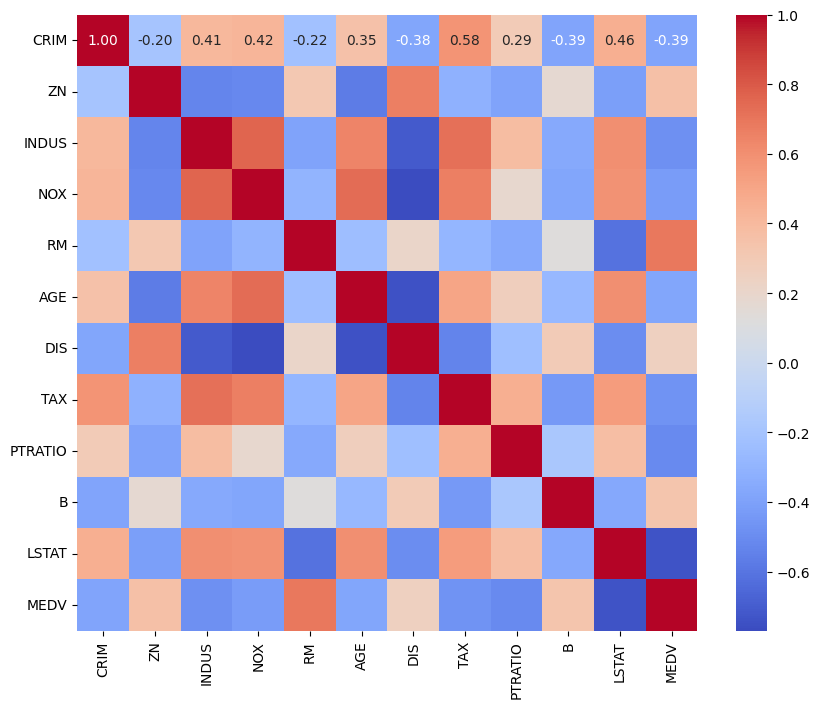

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

# Crear un mapa de calor para la matriz de correlación con Seaborn
plt.figure(figsize=(10, 8))
ax = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True, 
                 xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)

# Rotar las etiquetas del eje x para mejor visualización
plt.xticks(rotation=90)
plt.yticks(rotation=0)  # Asegurarse de que las etiquetas del eje y estén horizontales para mejor legibilidad

plt.show()

In [10]:
correlation_matrix

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,0.420972,-0.219247,0.352734,-0.379670,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.516604,0.311991,-0.569537,0.664408,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.763651,-0.391676,0.644779,-0.708027,0.720760,0.383248,-0.356977,0.603800,-0.483725
NOX,0.420972,-0.516604,0.763651,1.000000,-0.302188,0.731470,-0.769230,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,-0.302188,1.000000,-0.240265,0.205246,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.731470,-0.240265,1.000000,-0.747881,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.769230,0.205246,-0.747881,1.000000,-0.534432,-0.232471,0.291512,-0.496996,0.249929
TAX,0.582764,-0.314563,0.720760,0.668023,-0.292048,0.506456,-0.534432,1.000000,0.460853,-0.441808,0.543993,-0.468536
PTRATIO,0.289946,-0.391679,0.383248,0.188933,-0.355501,0.261515,-0.232471,0.460853,1.000000,-0.177383,0.374044,-0.507787
B,-0.385064,0.175520,-0.356977,-0.380051,0.128069,-0.273534,0.291512,-0.441808,-0.177383,1.000000,-0.366087,0.333461


### Partición y Estandarización de X

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X = df.drop('MEDV', axis=1)  
y = df['MEDV']               

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Evaluación de los Alphas

In [12]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV

#### El Alpha controla la penalización de los coeficientes del modelo, para prevenir el sobreajuste y mejorar la generalización.

#### Para la regresión Ridge, la penalización es proporcional al cuadrado de la magnitud de los coeficientes (norma L2). 

#### En LASSO, la penalización es proporcional a la magnitud absoluta de los coeficientes (norma L1).

#### Elastic-Net es una combinación de Ridge y LASSO. Utiliza ambas penalizaciones L1 y L2.  

#### λ (l1_ratio) es otro parámetro que balancea la contribución de L1 frente a L2. 𝛼 sigue siendo el parámetro general de penalización que controla la cantidad total de regularización.


#### NORMALIZAR

In [13]:
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_normalized = (X - X_mean) / X_std

#### GRAFICAR  
$$
\boldsymbol{\beta} = (\mathbf{X}^\top \mathbf{X} + \alpha \mathbf{I})^{-1} \mathbf{X}^\top \mathbf{y}
$$

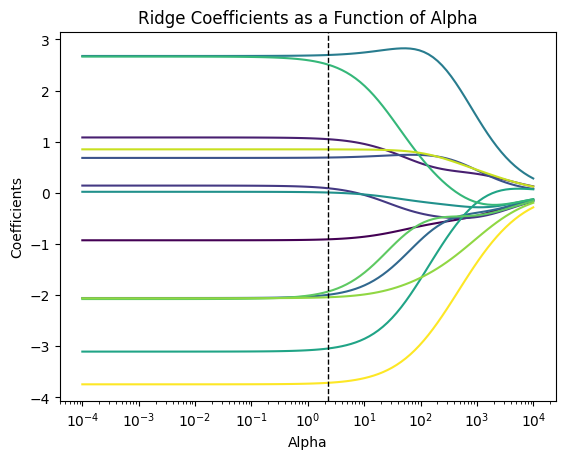

In [29]:
alphas = np.logspace(-4, 4, 100)
coefficients_ridge = []

for alpha in alphas:
    identity_matrix = np.eye(X_normalized.shape[1])
    ridge_coeff = np.linalg.inv(X_normalized.T @ X_normalized + alpha * identity_matrix) @ X_normalized.T @ y
    coefficients_ridge.append(ridge_coeff)

# Visualización de los coeficientes de Ridge
import matplotlib.pyplot as plt
plt.plot(alphas, coefficients_ridge)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('Ridge Coefficients as a Function of Alpha')

x_line = 10**0.363
plt.axvline(x=x_line, color='black', linestyle='--', linewidth=1)

plt.show()

In [24]:
pip install adjustText


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: C:\Users\aleja\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


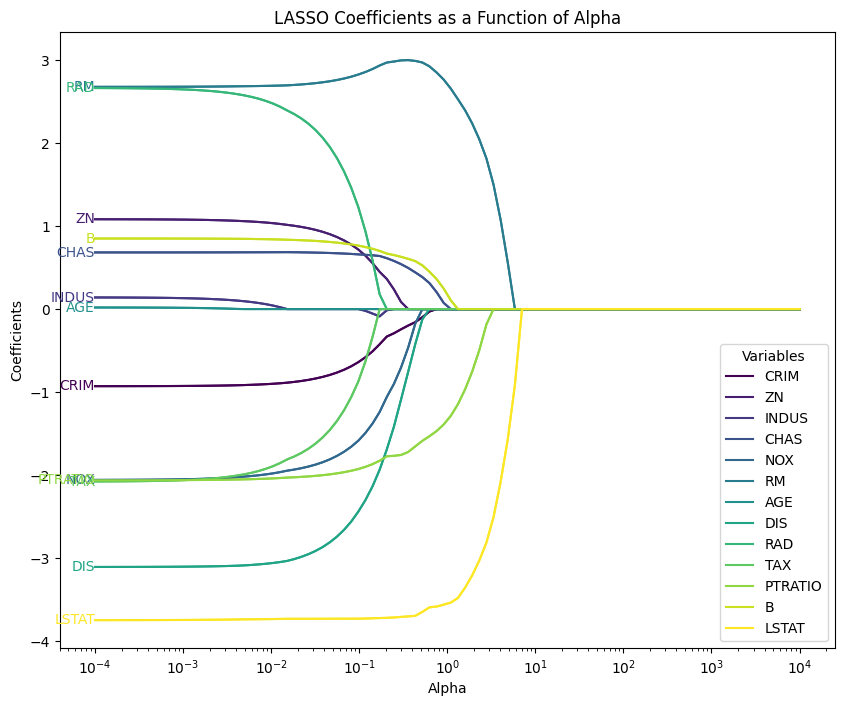

In [28]:
# Importaremos la clase Lasso de scikit-learn solo para la facilidad de cálculo
from sklearn.linear_model import Lasso
from cycler import cycler

coefficients_lasso = []

for alpha in alphas:
    lasso = Lasso(alpha=alpha, fit_intercept=False)
    lasso.fit(X_normalized, y)
    coefficients_lasso.append(lasso.coef_)

coefficients_lasso = np.array(coefficients_lasso)

"""
colormap = plt.cm.gist_ncar  # Puedes cambiar 'gist_ncar' por otro colormap
colorst = [colormap(i) for i in np.linspace(0, 0.9, num_lines)]

for i in range(coefficients_lasso.shape[1]):  # Asumiendo que cada columna en X_normalized es una característica
    plt.plot(alphas, coefficients_lasso[:, i], label=X_normalized.columns[i], color=colorst[i])"""
    
num_lines = coefficients_lasso.shape[1]    
colors = plt.cm.viridis(np.linspace(0, 1, num_lines))  # Usar colormap viridis
# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(10, 8))

# Graficar cada línea
for i in range(num_lines):
    line = ax.plot(alphas, coefficients_lasso[:, i], color=colors[i])
    # Añadir texto al inicio de cada línea
    y_pos = coefficients_lasso[0, i]  # Primer valor del coeficiente para la línea i
    ax.text(alphas[0], y_pos, X_normalized.columns[i], color=colors[i], ha='right', va='center')
# Visualización de los coeficientes de LASSO
plt.plot(alphas, coefficients_lasso,label=X_normalized.columns)
plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Coefficients')
plt.title('LASSO Coefficients as a Function of Alpha')
plt.legend(title="Variables")
plt.show()

##### Con este gráfico podríamos decir que con un Alpha mayor, se podría reducir variables para el modelo, o manteniendo todos los atributos, el alpha debe ser muy pequeño. Con un alpha de 10 ^-0.5 podemos quedar con 3 atributos (LSTAT, PTRARIO, RM)

##### Al revisar las correlaciones, podemos notar que estas 3 variables, son las que tienen mayor correlación con la variable respuesta (MEDV) : -0.737663, -0.507787, 0.695360 respectivamente, y entre ellas, PTRATIO tiene baja correlación con RM y LSTAT, pero entre LSTAT y RM hay una correlación media alta de -0.613808

### CRECIÓN DE LOS MODELOS

#### GridSearchCV es una herramienta que ayuda a automatizar el proceso de ajuste de parámetros para encontrar el mejor modelo posible.

#### Buscar exhaustivamente: Prueba todas las combinaciones posibles de los parámetros que se especifican.GridSearchCV entrenará un modelo para cada valor utilizando la técnica de validación cruzada.

#### Validación Cruzada: Para cada conjunto de parámetros, utiliza el método de validación cruzada (se especifica en el parámetro cv) para evaluar el rendimiento del modelo. 

#### Selección del Mejor Modelo: Una vez que todos los modelos han sido evaluados, selecciona el modelo que tuvo el mejor rendimiento de acuerdo con la métrica de rendimiento que se haya especificado (ejm: precisión, AUC ROC, RMSE, etc.).

#### RIDGE

In [46]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.model_selection import GridSearchCV

ridge = Ridge()
parameters = {'alpha': np.logspace(-4, 4, 100)}
ridge_cv = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)
ridge_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para Ridge:", ridge_cv.best_params_)
print("Mejor score para Ridge:", ridge_cv.best_score_)

Mejor valor de alpha para Ridge: {'alpha': 2.310129700083163}
Mejor score para Ridge: -23.64607294897078


In [22]:
np.log10(2.310129700083163)

0.3636363636363642

##### Eso significa que GridSearchCV eligió a $$ 10^{0.363}$$

##### Si revisamos el gráfico anterior de los coeficientes, más o menos en esta posición los coeficientes, si el alpha incrementa, los coeficientes empiezan a bajar a acercarse a 0.

#### LASSO

In [23]:
lasso = Lasso()
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para LASSO:", lasso_cv.best_params_)
print("Mejor score para LASSO:", lasso_cv.best_score_)

Mejor valor de alpha para LASSO: {'alpha': 0.0001}
Mejor score para LASSO: -23.654589851597517


In [29]:
np.log10(0.0001)

-4.0

##### Eso significa que GridSearchCV eligió a $$ 10^{-4}$$ 
##### El valor más extremo, por lo cuál podríamos intentar analizar ampliando el rango de búsqueda de alpha

In [32]:
lasso = Lasso()
parameters = {'alpha': np.logspace(-6, 6, 200)}
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(X_train_scaled, y_train)

print("Mejor valor de alpha para LASSO:", lasso_cv.best_params_)
print("Mejor score para LASSO:", lasso_cv.best_score_)

Mejor valor de alpha para LASSO: {'alpha': 1e-06}
Mejor score para LASSO: -23.654419976103718


In [33]:
np.log10(1e-06)

-6.0

##### Nuevamente eligió el valor más extremo, podemos probar dejando sólo las 3 variables que anotamos en el gráfico de los coeficientes para ver que resultado nos genera

In [32]:
X_train_scaled.shape

(404, 13)

In [34]:
selected_columns = X_train_scaled[:, [5, 10, 12]]
selected_columns.shape

(404, 3)

In [35]:
lasso = Lasso()
parameters = {'alpha': np.logspace(-6, 6, 200)}
lasso_cv = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)
lasso_cv.fit(selected_columns, y_train)

print("Mejor valor de alpha para LASSO:", lasso_cv.best_params_)
print("Mejor score para LASSO:", lasso_cv.best_score_)

Mejor valor de alpha para LASSO: {'alpha': 0.012603829296797275}
Mejor score para LASSO: -28.441036578551085


#####  El score de -23 (anterior) es más eficaz en términos de ajuste al conjunto de datos dado que tiene una pérdida media cuadrática menor. Podría ser que las correlaciones entre los atributos genere que al reducir las variables, no mejore el rendimiento

##### Eligiendo el primer modelo, se podría decir que posiblemente se está sufriendo de underfitting cuando 𝛼 es más alto, es decir, que la regularización está degradando la capacidad del modelo para capturar la relación subyacente en los datos.

#### ELASTIC NET

In [39]:
elastic_net = ElasticNet()
parameters_en = {'alpha': np.logspace(-4, 4, 100), 'l1_ratio': np.linspace(0.01, 1, 25)}
elastic_net_cv = GridSearchCV(elastic_net, parameters_en, scoring='neg_mean_squared_error', cv=5)
elastic_net_cv.fit(X_train_scaled, y_train)

print("Mejores parámetros para Elastic-Net:", elastic_net_cv.best_params_)
print("Mejor score para Elastic-Net:", elastic_net_cv.best_score_)

Mejores parámetros para Elastic-Net: {'alpha': 0.007220809018385471, 'l1_ratio': 0.01}
Mejor score para Elastic-Net: -23.64626672260496


In [30]:
np.log10(0.007220809018385471)

-2.141414141414141

##### Eso significa que GridSearchCV eligió a $$ 10^{-2.14}$$ 

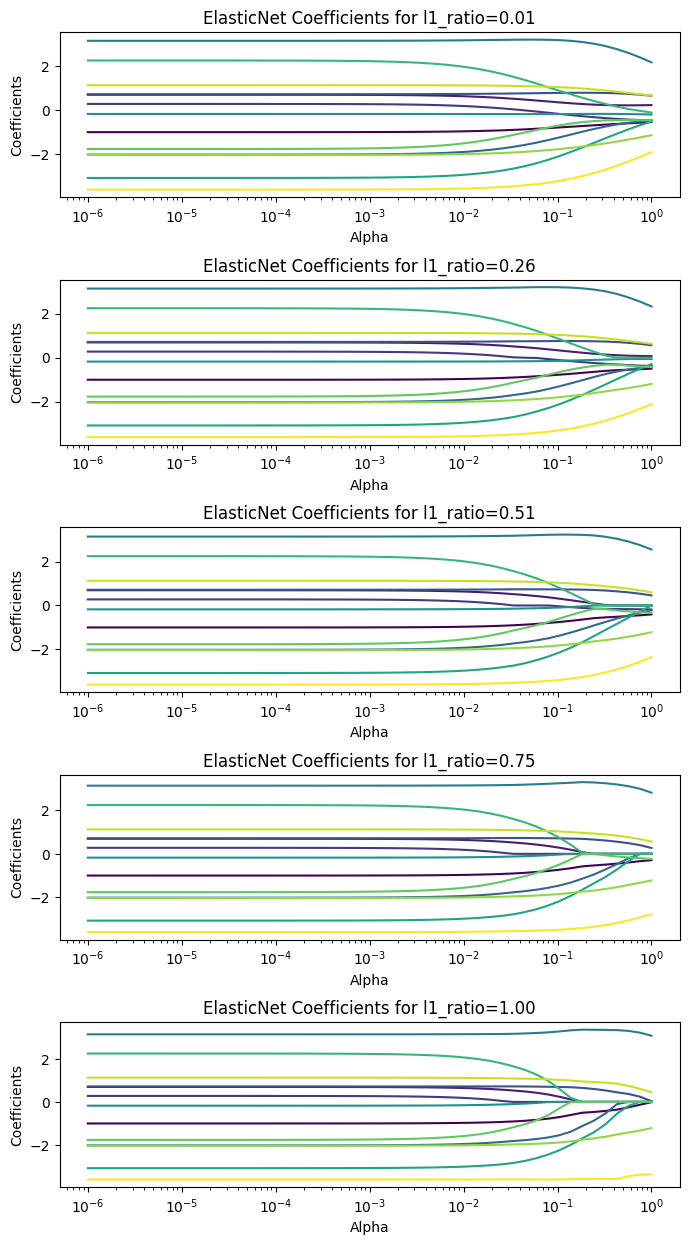

In [37]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import ElasticNet

# Definir los valores de alpha y l1_ratio
alphas = np.logspace(-6, 0, 50)  # Ajusta esto según tu rango explorado
l1_ratios = np.linspace(0.01, 1.0, 5)  # 5 diferentes l1_ratios para demostración

# Crear subplots
fig, axes = plt.subplots(nrows=len(l1_ratios), ncols=1, figsize=(8, 15))
fig.subplots_adjust(hspace=0.5)  # Ajustar el espacio entre gráficos

# Reentrenar y recoger coeficientes para cada l1_ratio
for idx, l1_ratio in enumerate(l1_ratios):
    coefs = []
    for alpha in alphas:
        model = ElasticNet(alpha=alpha, l1_ratio=l1_ratio)
        model.fit(X_train_scaled, y_train)
        coefs.append(model.coef_)
    
    coefs = np.array(coefs)
    
    # Graficar la evolución de los coeficientes para este l1_ratio en su subplot
    for i in range(coefs.shape[1]):  # Asumiendo que tienes más de un coeficiente
        axes[idx].plot(alphas, coefs[:, i], label=f'Feature {i+1}')
    
    axes[idx].set_xscale('log')
    axes[idx].set_xlabel('Alpha')
    axes[idx].set_ylabel('Coefficients')
    axes[idx].set_title(f'ElasticNet Coefficients for l1_ratio={l1_ratio:.2f}')
    #axes[idx].legend()

plt.show()

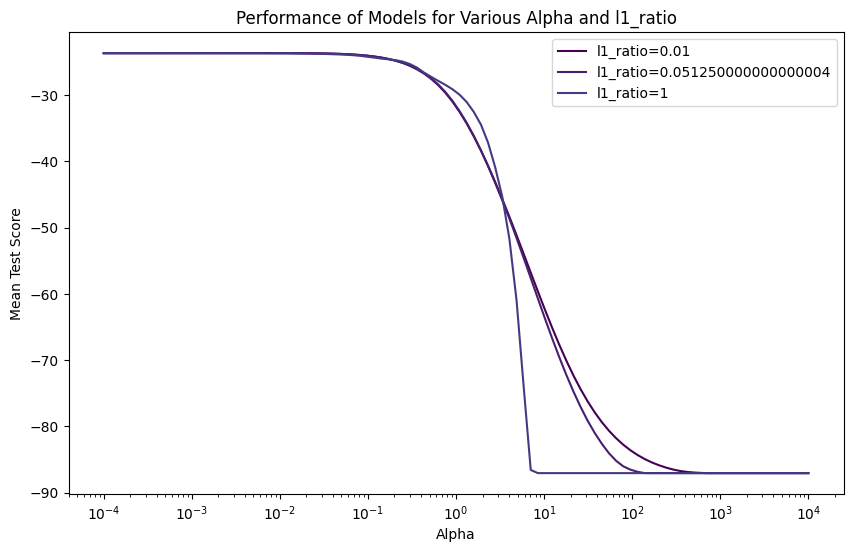

In [44]:
# Convertir los resultados a un DataFrame
results = pd.DataFrame(elastic_net_cv.cv_results_)

# Visualización
plt.figure(figsize=(10, 6))
#for l1_ratio in results['param_l1_ratio'].unique():
for l1_ratio in [0.01, 0.051250000000000004, 1]:
    subset = results[results['param_l1_ratio'] == l1_ratio]
    plt.plot(subset['param_alpha'], subset['mean_test_score'], label=f'l1_ratio={l1_ratio}')

plt.xscale('log')
plt.xlabel('Alpha')
plt.ylabel('Mean Test Score')
plt.title('Performance of Models for Various Alpha and l1_ratio')
plt.legend()
plt.show()

#### Todos los scores están en formato negativo porque GridSearchCV utiliza "negative mean squared error" (error cuadrático medio negativo) como la métrica para la evaluación. Esto significa que valores más cercanos a cero son mejores, ya que representan un error más bajo.

#### El hecho de que LASSO y Elastic-Net tengan configuraciones óptimas con un 𝛼 muy bajo sugiere que podrían no estar aprovechando al máximo su capacidad de regularización. Específicamente para Elastic-Net, un l1_ratio tan bajo indica que la penalización está siendo aplicada casi en su totalidad como regularización L2 (Ridge), con solo una pequeña parte de la penalización L1 (LASSO).

#### La caída pronunciada en el rendimiento a medida que 𝛼 aumenta podría indicar que el modelo comienza a sufrir de subajuste. A valores muy altos de 𝛼, la penalización se hace tan dominante que los coeficientes del modelo se reducen significativamente. Esto lleva a que el modelo pierda la capacidad de capturar la variabilidad de los datos y, por lo tanto, su rendimiento decrece notablemente

### REVISIÓN DE LOS COEFICIENTES

In [34]:
# Coeficientes de Ridge
coefficients_ridge = ridge_cv.best_estimator_.coef_

# Coeficientes de LASSO
coefficients_lasso = lasso_cv.best_estimator_.coef_

# Coeficientes de Elastic-Net
coefficients_elastic_net = elastic_net_cv.best_estimator_.coef_

print(f"Coeficientes de Ridge: {coefficients_ridge}")
print(f"Coeficientes de LASSO: {coefficients_lasso}")
print(f"Coeficientes de Elastic-Net: {coefficients_elastic_net}")

Coeficientes de Ridge: [-0.9799235   0.65515706  0.221005    0.726986   -1.9511889   3.15898799
 -0.17863612 -2.99834436  2.07887188 -1.61036187 -2.0153308   1.12411829
 -3.58282066]
Coeficientes de LASSO: [-1.00213255  0.69626365  0.27805573  0.71873855 -2.02231308  3.1452402
 -0.17604561 -3.08190058  2.25138858 -1.76699577 -2.03774966  1.12956712
 -3.61165817]
Coeficientes de Elastic-Net: [-0.9745792   0.64540755  0.20749467  0.72884808 -1.93381539  3.16200437
 -0.1790112  -2.97782412  2.03867124 -1.57434459 -2.00985394  1.12268482
 -3.57583036]


In [48]:
# Obtener el intercepto de cada modelo
ridge_intercept = ridge_cv.best_estimator_.intercept_
lasso_intercept = lasso_cv.best_estimator_.intercept_
elastic_net_intercept = elastic_net_cv.best_estimator_.intercept_

# Imprimir los interceptos
print("Ridge Intercept:", ridge_intercept)
print("Lasso Intercept:", lasso_intercept)
print("Elastic Net Intercept:", elastic_net_intercept)

Ridge Intercept: 22.796534653465343
Lasso Intercept: 22.796534653465347
Elastic Net Intercept: 22.796534653465343


##### Ridge: Generalmente no reduce los coeficientes exactamente a cero. Por lo tanto, todas las variables permanecen en el modelo, pero con coeficientes posiblemente reducidos.
##### LASSO: Es conocido por su capacidad de realizar selección de variables al reducir los coeficientes de algunas variables exactamente a cero, lo que efectivamente las elimina del modelo.Para este caso, no lo hizo
##### Elastic-Net: Combina las propiedades de Ridge y LASSO. Reduce algunos coeficientes a cero (como LASSO) y reduce otros (como Ridge).

Los coeficientes más grandes en magnitud (positivos o negativos) sugieren una mayor influencia en la variable respuesta. Por ejemplo, el coeficiente para la sexta y última variable sugiere una fuerte influencia positiva y negativa, respectivamente, en la variable respuesta en los 3 modelos. Que justamente son RM y LSTAT, que anteriormente habíamos visto como variables para dejar, en caso de eliminar variables, y que tiene una alta correlación con la variable respuesta.

$$
\text{Ridge Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

$$
\text{LASSO Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

$$
\text{Elastic-Net Regression:} \\
y = \beta_0 + \beta_1 X_1 + \beta_2 X_2 + \beta_3 X_3 + \ldots + \beta_{13} X_{13}
$$

##### Razón por la que el intercepto es el mismo en los 3 modelos: La regularización en LASSO y Ridge afecta principalmente los coeficientes de las variables y no directamente el intercepto. En scikit-learn, el intercepto no está sujeto a penalización en estos modelos, por lo que si la estructura subyacente de los datos que están siendo modelados es consistente, el intercepto podría ser similar en modelos que tienen la misma interpretación base de la variable dependiente. Elastic-Net, al combinar LASSO y Ridge, seguiría este mismo patrón.

### EVALUAR LOS MODELOS

In [35]:
from sklearn.metrics import mean_squared_error

y_pred_ridge = ridge_cv.predict(X_test_scaled)
y_pred_lasso = lasso_cv.predict(X_test_scaled)
y_pred_elastic_net = elastic_net_cv.predict(X_test_scaled)

rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
rmse_elastic_net = np.sqrt(mean_squared_error(y_test, y_pred_elastic_net))

print("RMSE Ridge:", rmse_ridge)
print("RMSE LASSO:", rmse_lasso)
print("RMSE Elastic-Net:", rmse_elastic_net)

RMSE Ridge: 4.93369651813757
RMSE LASSO: 4.928602524066675
RMSE Elastic-Net: 4.934990017029132


####  La diferencia más significativa está entre LASSO y los otros dos modelos, aunque es muy pequeña (menos de 0.01). Esto indica que, en términos de error cuadrático medio, la eficacia de los modelos es prácticamente la misma.

## 1.2

### Primero grafiquemos para ver cómo están distribuidos los datos y si encontramos outliers

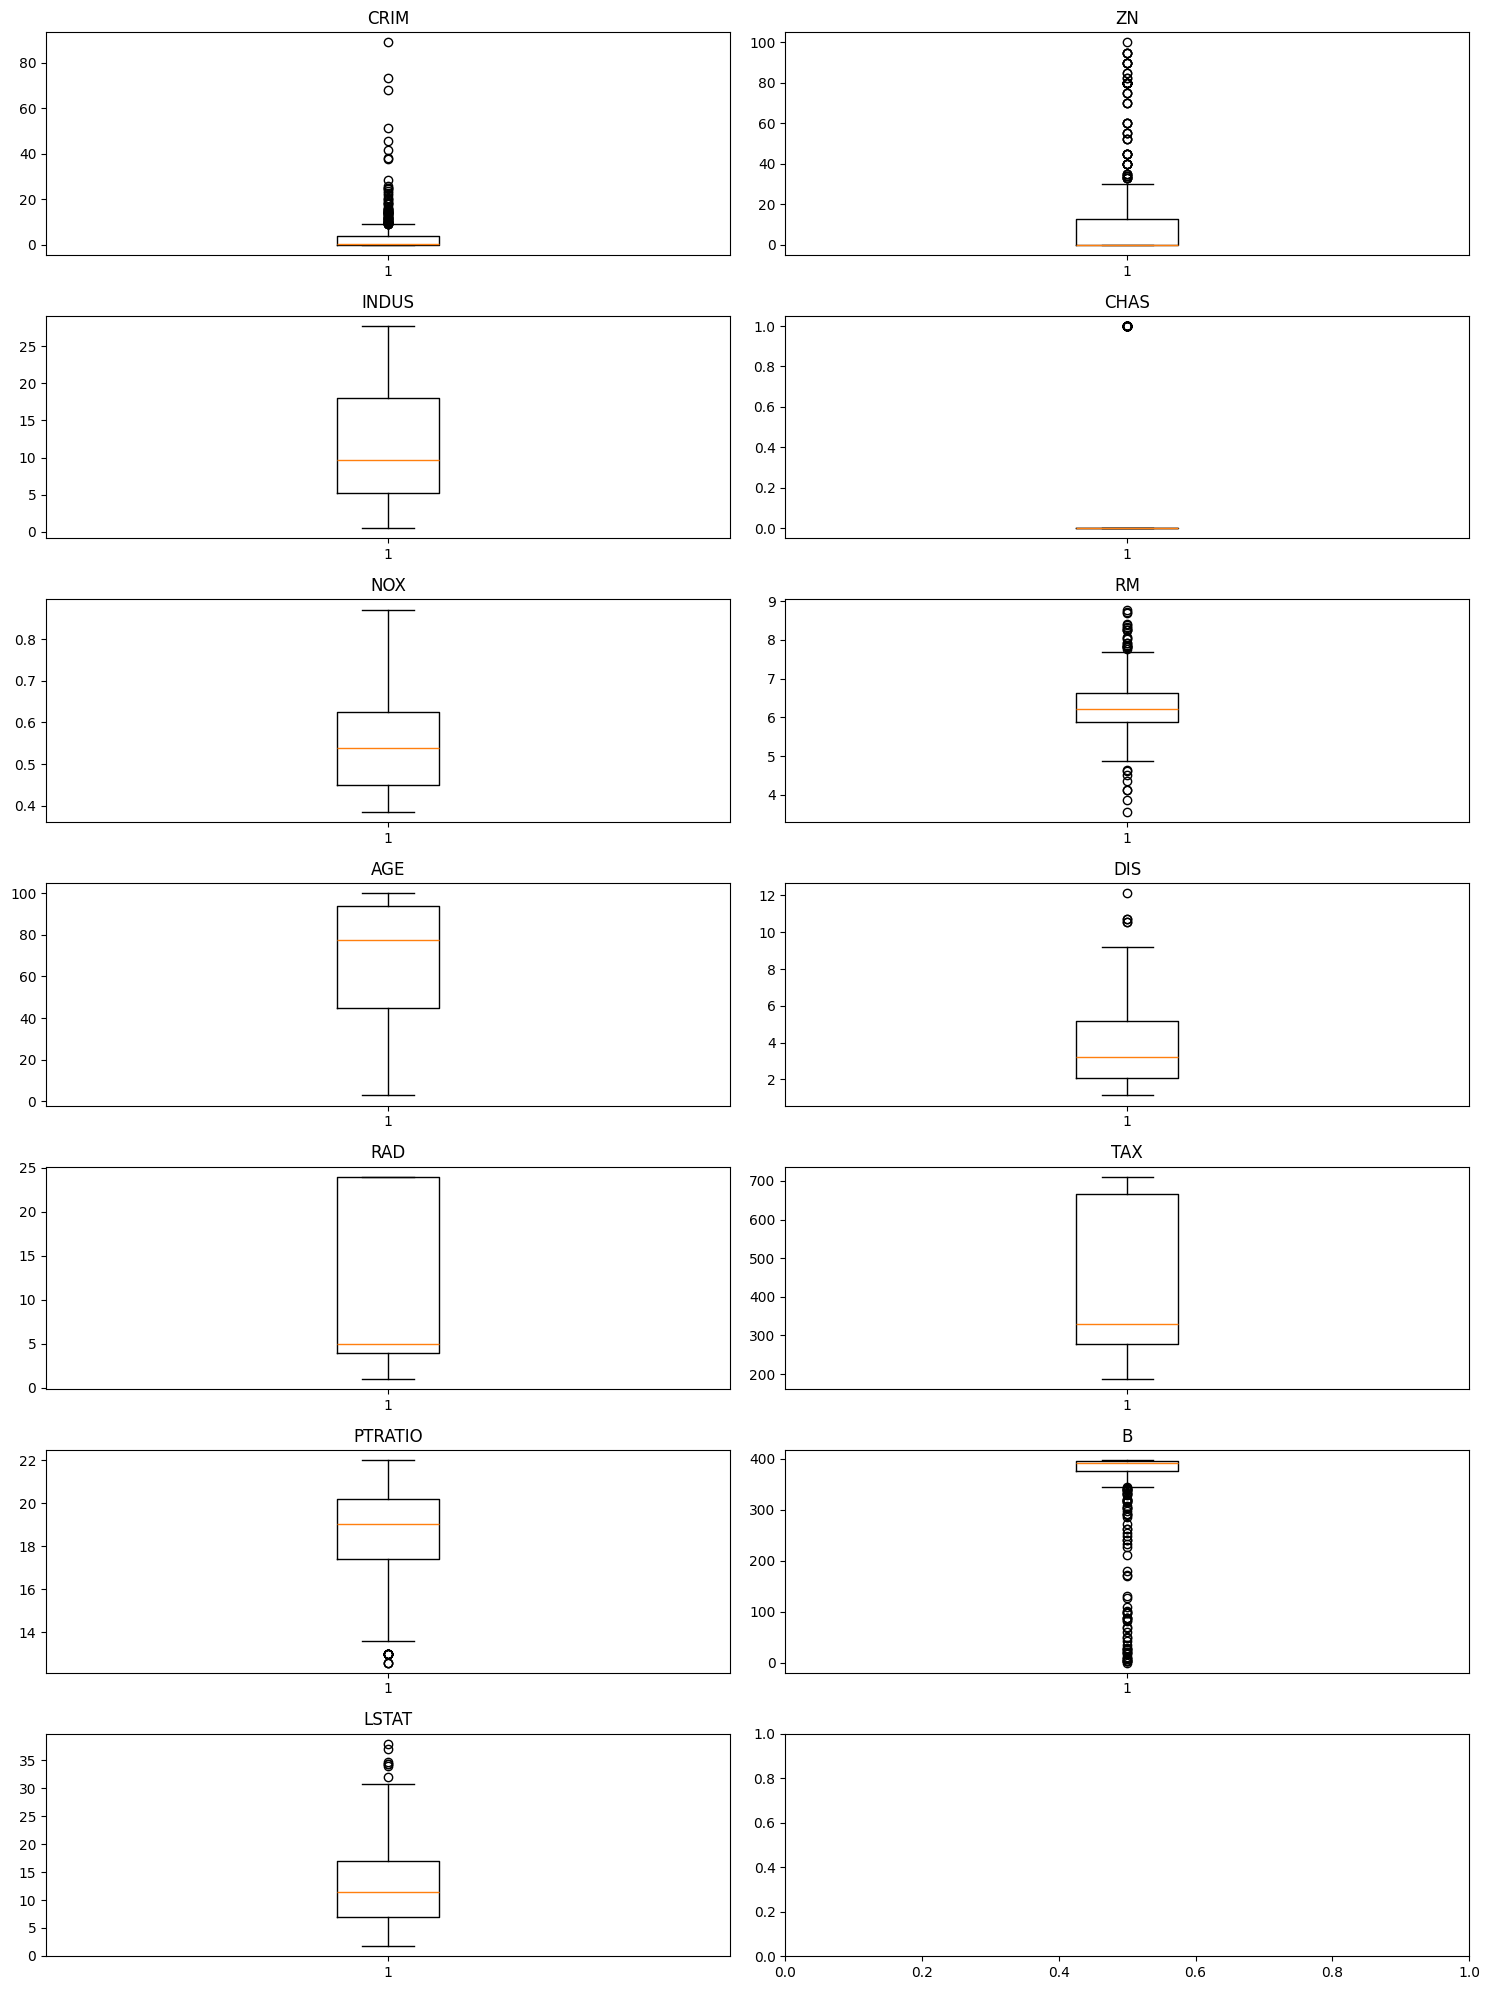

In [4]:
import matplotlib.pyplot as plt

# Eliminar la columna 'MEDV' ya que es la variable respuesta
X = df.drop(columns=['MEDV'])

# Crear boxplots para cada variable
fig, axs = plt.subplots(nrows=7, ncols=2, figsize=(15, 20))
axs = axs.flatten()

for i, col in enumerate(X.columns):
    axs[i].boxplot(X[col])
    axs[i].set_title(col)

# Ajustar el layout para una mejor visualización
plt.tight_layout()
plt.show()

In [52]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


##### CRIM: La alta desviación estándar y el amplio rango entre el mínimo y el máximo indican que hay una gran variabilidad en las tasas de criminalidad en las diferentes áreas. Hay presencia de varios outliers en el extremo superior, como se vio en el boxplot.
##### ZN: La media es relativamente baja comparada con el valor máximo, y la alta desviación estándar sugiere que hay muchas áreas con proporciones muy bajas y algunas con proporciones muy altas, indicando outliers en el extremo superior.
##### B: Outliers en el extremo inferior, pero la mayoría de las áreas tienen una alta proporción de personas de raza negra.

#### EN CONCLUSIÓN TENEMOS VARIOS OUTLIERS

### Para este caso, nuestro conjuto Z, serán las Variables independientes, es decir X

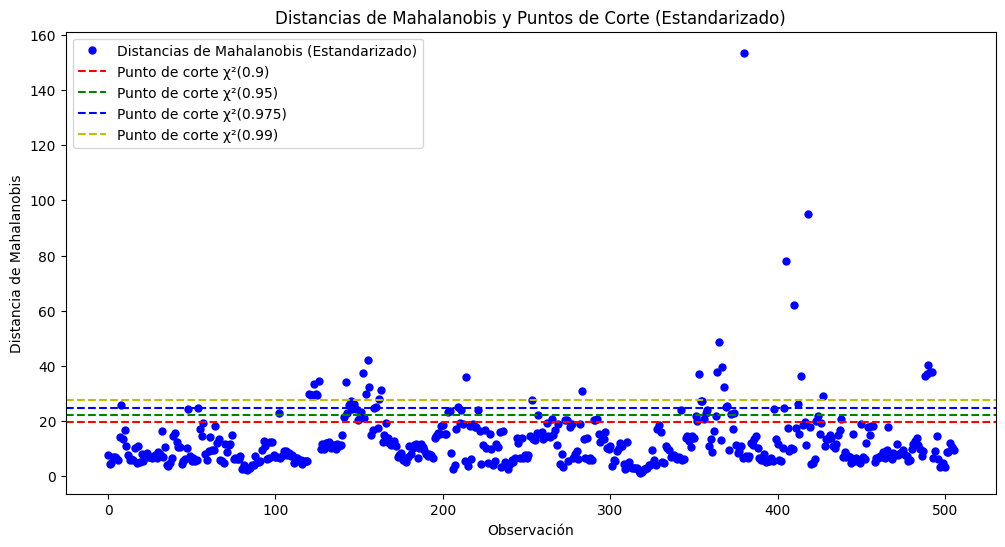

puntos de corte: [19.81192930712756, 22.362032494826934, 24.735604884931547, 27.68824961045705]
outliers: {0.9: array([  8,  48,  54, 102, 120, 121, 122, 123, 124, 125, 126, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 159, 160, 162, 163, 203, 204, 209, 211, 214, 221, 253, 257,
       265, 273, 274, 283, 290, 291, 292, 342, 351, 352, 353, 354, 355,
       356, 357, 358, 363, 364, 365, 367, 368, 369, 370, 372, 374, 380,
       398, 404, 405, 410, 412, 414, 418, 423, 424, 427, 438, 488, 489,
       490, 491, 492], dtype=int64), 0.95: array([  8,  48,  54, 102, 120, 121, 122, 123, 124, 125, 126, 142, 143,
       144, 145, 146, 147, 148, 151, 152, 154, 155, 156, 159, 160, 162,
       163, 203, 204, 209, 211, 214, 221, 253, 283, 342, 353, 354, 355,
       357, 358, 364, 365, 367, 368, 369, 370, 372, 374, 380, 398, 404,
       405, 410, 412, 414, 418, 427, 488, 489, 490, 491, 492], dtype=int64), 0.975: array([  8, 120, 121, 122, 123, 124, 125,

In [5]:
from scipy.stats import chi2

# Estandarizar las variables (excepto la variable de respuesta 'MEDV')
scaler = StandardScaler()
Z_standardized = scaler.fit_transform(X)

# Calcular el vector de medias y la matriz de covarianza para los datos estandarizados
mu_hat_std = np.mean(Z_standardized, axis=0)
cov_hat_std = np.cov(Z_standardized, rowvar=False)
cov_hat_inv_std = np.linalg.inv(cov_hat_std)

# Calcular las distancias de Mahalanobis para los datos estandarizados
MD_sq = np.array([(z - mu_hat_std) @ cov_hat_inv_std @ (z - mu_hat_std).T for z in Z_standardized])

# Sacar la raíz cuadrada de los valores de Mahalanobis
MD = np.sqrt(MD_sq)

# Determinar los puntos de corte para diferentes valores de q
qs = [0.90, 0.95, 0.975, 0.99]
cutoff_points_std = [chi2.ppf(q, Z_standardized.shape[1]) for q in qs]

# Graficar las distancias de Mahalanobis y los puntos de corte para los datos estandarizados
plt.figure(figsize=(12, 6))
plt.plot(MD_sq, 'bo', markersize=5, label='Distancias de Mahalanobis (Estandarizado)')
colors = ['r', 'g', 'b', 'y']
for q, cutoff, color in zip(qs, cutoff_points_std, colors):
    plt.axhline(y=cutoff, color=color, linestyle='--', label=f'Punto de corte χ²({q})')

plt.xlabel('Observación')
plt.ylabel('Distancia de Mahalanobis')
plt.title('Distancias de Mahalanobis y Puntos de Corte (Estandarizado)')
plt.legend()
plt.show()

# Identificar observaciones atípicas
outliers_std = {q: np.where(MD_sq > cutoff)[0] for q, cutoff in zip(qs, cutoff_points_std)}

print(f"puntos de corte: {cutoff_points_std}")
print(f"outliers: {outliers_std}")

#### Vamos a marcar en el Dataset cuáles son registros atípicos para cada columna

In [6]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_colwidth', None)

In [7]:
outlier_columns = [f'{col}_outlier' for col in X.columns]

In [8]:
for col in X.columns:
    Q1 = X[col].quantile(0.25)
    Q3 = X[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identificar outliers
    X[f'{col}_outlier'] = ((X[col] < lower_bound) | (X[col] > upper_bound))

#### Compararlos en el Dataset Original

In [9]:
X['MD_sq'] = MD_sq
X['MD'] = MD

# Identificar observaciones atípicas para cada punto de corte
for q, cutoff in zip(qs, cutoff_points_std):
    X[f'atypical_{q}'] = X['MD_sq'] > cutoff

In [10]:
df_outliers_all = X[np.all(X[outlier_columns], axis=1)]
df_outliers_all

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_outlier,ZN_outlier,INDUS_outlier,CHAS_outlier,NOX_outlier,RM_outlier,AGE_outlier,DIS_outlier,RAD_outlier,TAX_outlier,PTRATIO_outlier,B_outlier,LSTAT_outlier,MD_sq,MD,atypical_0.9,atypical_0.95,atypical_0.975,atypical_0.99


##### SIGNIFICA QUE NO HAY UN REGISTRO QUE SEA ATÍPICO EN TODAS SUS VARIABLES, POR LO TANTO EMPEZAREMOS A ANALIZAR LAS COLUMNAS QUE NOS MOSTRÓ EL ANTERIOR BOXPLOT QUE TENÍA MÁS ATÍPICOS: CRIM, ZN y B

In [21]:
CZB_outlier = X[(X['CRIM_outlier']) & (X['B_outlier']) & (X['ZN_outlier'])]
CZB_outlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_outlier,ZN_outlier,INDUS_outlier,CHAS_outlier,NOX_outlier,RM_outlier,AGE_outlier,DIS_outlier,RAD_outlier,TAX_outlier,PTRATIO_outlier,B_outlier,LSTAT_outlier,MD_sq,MD,atypical_0.9,atypical_0.95,atypical_0.975,atypical_0.99


##### Tampoco hay algún registro que sea atípico en las 3 columnas de mayor atípicos, entonces se analizará de manera individual

In [11]:
CRIM_outlier = X[(X['CRIM_outlier']) & 
                 ((X['atypical_0.9'])|(X['atypical_0.95'])|(X['atypical_0.975'])|(X['atypical_0.99']))]
CRIM_outlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_outlier,ZN_outlier,INDUS_outlier,CHAS_outlier,NOX_outlier,RM_outlier,AGE_outlier,DIS_outlier,RAD_outlier,TAX_outlier,PTRATIO_outlier,B_outlier,LSTAT_outlier,MD_sq,MD,atypical_0.9,atypical_0.95,atypical_0.975,atypical_0.99
367,13.5222,0.0,18.1,0,0.631,3.863,100.0,1.5106,24,666.0,20.2,131.42,13.33,True,False,False,False,False,True,False,False,False,False,False,True,False,39.619221,6.294380,True,True,True,True
374,18.4982,0.0,18.1,0,0.668,4.138,100.0,1.1370,24,666.0,20.2,396.90,37.97,True,False,False,False,False,True,False,False,False,False,False,False,True,23.039525,4.799950,True,True,False,False
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,True,False,False,False,False,False,False,False,False,False,False,False,False,153.511519,12.389977,True,True,True,True
398,38.3518,0.0,18.1,0,0.693,5.453,100.0,1.4896,24,666.0,20.2,396.90,30.59,True,False,False,False,False,False,False,False,False,False,False,False,False,24.318354,4.931364,True,True,False,False
404,41.5292,0.0,18.1,0,0.693,5.531,85.4,1.6074,24,666.0,20.2,329.46,27.38,True,False,False,False,False,False,False,False,False,False,False,True,False,24.625643,4.962423,True,True,False,False
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,True,False,False,False,False,False,False,False,False,False,False,False,False,78.000392,8.831783,True,True,True,True
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11,True,False,False,False,False,False,False,False,False,False,False,True,False,61.979008,7.872675,True,True,True,True
412,18.8110,0.0,18.1,0,0.597,4.628,100.0,1.5539,24,666.0,20.2,28.79,34.37,True,False,False,False,False,True,False,False,False,False,False,True,True,26.234488,5.121961,True,True,True,False
414,45.7461,0.0,18.1,0,0.693,4.519,100.0,1.6582,24,666.0,20.2,88.27,36.98,True,False,False,False,False,True,False,False,False,False,False,True,True,36.307212,6.025547,True,True,True,True
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62,True,False,False,False,False,False,False,False,False,False,False,True,False,95.002963,9.746946,True,True,True,True


In [29]:
X['CRIM'].describe()

count    506.000000
mean       3.613524
std        8.601545
min        0.006320
25%        0.082045
50%        0.256510
75%        3.677083
max       88.976200
Name: CRIM, dtype: float64

##### Como vemos, las variables ZN,INDUS,CHAS,RAD,PTRATIO. Tienen los mismos valores para todos los registros outliers. El promedio de la variable es muy bajo comparado con los valores de los outliers, por lo que estamos viendo los lugares con tasas muy altas de criminalidad. Prácticamnte estas variables nos están describiendo el comportamiento y la forma de los lugrares con mayor crimen.

In [12]:
CRIM_NO_MAHA = X[(X['CRIM_outlier']) & 
                 ~(X['atypical_0.9']) &
                  ~(X['atypical_0.95']) &
                  ~(X['atypical_0.975']) &
                  ~(X['atypical_0.99'])]

In [13]:
print(f"Total atípicos CRIM: {len(X[(X['CRIM_outlier'])])}")
print(f"CRIM: atípicos boxplot y Mahalanobis: {len(CRIM_outlier)}")
print(f"atípicos boxplot y No Mahalanobis: {len(CRIM_NO_MAHA)}")

Total atípicos CRIM: 66
CRIM: atípicos boxplot y Mahalanobis: 12
atípicos boxplot y No Mahalanobis: 54


In [14]:
ZN_outlier = X[(X['ZN_outlier']) & 
                 ((X['atypical_0.9'])|(X['atypical_0.95'])|(X['atypical_0.975'])|(X['atypical_0.99']))]
ZN_outlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_outlier,ZN_outlier,INDUS_outlier,CHAS_outlier,NOX_outlier,RM_outlier,AGE_outlier,DIS_outlier,RAD_outlier,TAX_outlier,PTRATIO_outlier,B_outlier,LSTAT_outlier,MD_sq,MD,atypical_0.9,atypical_0.95,atypical_0.975,atypical_0.99
54,0.01360,75.0,4.00,0,0.4100,5.888,47.6,7.3197,3,469.0,21.1,396.90,14.80,False,True,False,False,False,False,False,False,False,False,False,False,False,24.648395,4.964715,True,True,False,False
203,0.03510,95.0,2.68,0,0.4161,7.853,33.2,5.1180,4,224.0,14.7,392.78,3.81,False,True,False,False,False,True,False,False,False,False,False,False,False,23.195716,4.816193,True,True,False,False
204,0.02009,95.0,2.68,0,0.4161,8.034,31.9,5.1180,4,224.0,14.7,390.55,2.88,False,True,False,False,False,True,False,False,False,False,False,False,False,23.792498,4.877755,True,True,False,False
274,0.05644,40.0,6.41,1,0.4470,6.758,32.9,4.0776,4,254.0,17.6,396.90,3.53,False,True,False,True,False,False,False,False,False,False,False,False,False,20.247354,4.499706,True,False,False,False
283,0.01501,90.0,1.21,1,0.4010,7.923,24.8,5.8850,1,198.0,13.6,395.52,3.16,False,True,False,True,False,True,False,False,False,False,False,False,False,30.745142,5.544830,True,True,True,True
290,0.03502,80.0,4.95,0,0.4110,6.861,27.9,5.1167,4,245.0,19.2,396.90,3.33,False,True,False,False,False,False,False,False,False,False,False,False,False,20.298163,4.505348,True,False,False,False
291,0.07886,80.0,4.95,0,0.4110,7.148,27.7,5.1167,4,245.0,19.2,396.90,3.56,False,True,False,False,False,False,False,False,False,False,False,False,False,20.281327,4.503479,True,False,False,False
292,0.03615,80.0,4.95,0,0.4110,6.630,23.4,5.1167,4,245.0,19.2,396.90,4.70,False,True,False,False,False,False,False,False,False,False,False,False,False,20.713910,4.551254,True,False,False,False
351,0.07950,60.0,1.69,0,0.4110,6.579,35.9,10.7103,4,411.0,18.3,370.78,5.49,False,True,False,False,False,False,False,True,False,False,False,False,False,21.795612,4.668577,True,False,False,False
352,0.07244,60.0,1.69,0,0.4110,5.884,18.5,10.7103,4,411.0,18.3,392.33,7.79,False,True,False,False,False,False,False,True,False,False,False,False,False,20.002832,4.472453,True,False,False,False


#### En el caso anterior de CRIM, vimos que ZN estaba en 0, y ahora vemos que para los valores altos en ZN, se obtienen los valores más bajos de CRIM, por lo que podríamos concluir una cierta relación entre estas 2 variables, a pesar de que en el análisis de correlación, fue muy baja, prácticamente nula  (-0.2), pero negativa, que al menos sí coinciden en dirección.

In [15]:
ZN_NO_MAHA = X[(X['ZN_outlier']) & 
                ~(X['atypical_0.9']) &
                ~(X['atypical_0.95']) &
                ~(X['atypical_0.975']) &
                ~(X['atypical_0.99'])]

In [16]:
print(f"Total atípicos ZN: {len(X[(X['ZN_outlier'])])}")
print(f"ZN: atípicos boxplot y Mahalanobis: {len(ZN_outlier)}")
print(f"atípicos boxplot y No Mahalanobis: {len(ZN_NO_MAHA)}")

Total atípicos ZN: 68
ZN: atípicos boxplot y Mahalanobis: 13
atípicos boxplot y No Mahalanobis: 55


In [17]:
B_outlier = X[(X['B_outlier']) & 
                 ((X['atypical_0.9'])|(X['atypical_0.95'])|(X['atypical_0.975'])|(X['atypical_0.99']))]
B_outlier

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_outlier,ZN_outlier,INDUS_outlier,CHAS_outlier,NOX_outlier,RM_outlier,AGE_outlier,DIS_outlier,RAD_outlier,TAX_outlier,PTRATIO_outlier,B_outlier,LSTAT_outlier,MD_sq,MD,atypical_0.9,atypical_0.95,atypical_0.975,atypical_0.99
102,0.22876,0.0,8.56,0,0.520,6.405,85.4,2.7147,5,384.0,20.9,70.80,10.63,False,False,False,False,False,False,False,False,False,False,False,True,False,23.078028,4.803960,True,True,False,False
145,2.37934,0.0,19.58,0,0.871,6.130,100.0,1.4191,5,403.0,14.7,172.91,27.80,False,False,False,False,False,False,False,False,False,False,False,True,False,27.276632,5.222703,True,True,True,False
146,2.15505,0.0,19.58,0,0.871,5.628,100.0,1.5166,5,403.0,14.7,169.27,16.65,False,False,False,False,False,False,False,False,False,False,False,True,False,24.260107,4.925455,True,True,False,False
151,1.49632,0.0,19.58,0,0.871,5.404,100.0,1.5916,5,403.0,14.7,341.60,13.28,False,False,False,False,False,False,False,False,False,False,False,True,False,23.175259,4.814069,True,True,False,False
152,1.12658,0.0,19.58,1,0.871,5.012,88.0,1.6102,5,403.0,14.7,343.28,12.12,False,False,False,True,False,False,False,False,False,False,False,True,False,37.451966,6.119801,True,True,True,True
153,2.14918,0.0,19.58,0,0.871,5.709,98.5,1.6232,5,403.0,14.7,261.95,15.79,False,False,False,False,False,False,False,False,False,False,False,True,False,21.094080,4.592829,True,False,False,False
154,1.41385,0.0,19.58,1,0.871,6.129,96.0,1.7494,5,403.0,14.7,321.02,15.12,False,False,False,True,False,False,False,False,False,False,False,True,False,29.959138,5.473494,True,True,True,True
155,3.53501,0.0,19.58,1,0.871,6.152,82.6,1.7455,5,403.0,14.7,88.01,15.02,False,False,False,True,False,False,False,False,False,False,False,True,False,42.066690,6.485884,True,True,True,True
156,2.44668,0.0,19.58,0,0.871,5.272,94.0,1.7364,5,403.0,14.7,88.63,16.14,False,False,False,False,False,False,False,False,False,False,False,True,False,32.276690,5.681258,True,True,True,True
160,1.27346,0.0,19.58,1,0.605,6.250,92.6,1.7984,5,403.0,14.7,338.92,5.50,False,False,False,True,False,False,False,False,False,False,False,True,False,25.249150,5.024853,True,True,True,False


##### A diferencia de los 2 anteriores análisis, donde los valores de todos los registros eran cercanos, en este caso, la variable que estamos analizando tiene mucha variabilidad. Vemos que ZN es constante y que los valores de INDUS son altos, igual que pasaba con el análisis de CRIM, donde ZN también fue 0 para todos los registros, INDUS fue constante en un valor alto, y en el análisis de ZN donde los valores fueron más altos, los valores de INDUS bajaron, así que también puede verse una relación, en este caso, el análisis de correlación, dio media negativa con -0.53, es congruente con la dirección.

In [18]:
B_NO_MAHA = X[(X['B_outlier']) & 
            ~(X['atypical_0.9']) &
            ~(X['atypical_0.95']) &
            ~(X['atypical_0.975']) &
            ~(X['atypical_0.99'])]

In [19]:
print(f"Total atípicos B: {len(X[(X['B_outlier'])])}")
print(f"B: atípicos boxplot y Mahalanobis: {len(B_outlier)}")
print(f"atípicos boxplot y No Mahalanobis: {len(B_NO_MAHA)}")

Total atípicos B: 77
B: atípicos boxplot y Mahalanobis: 22
atípicos boxplot y No Mahalanobis: 55


##### Hubieron demasiados atípicos identificados por el método de boxplot, que no identificó la distancia de Mahalanobis

##### el valor de 𝑞 influye directamente en la sensibilidad del método para identificar atípicos. Un 𝑞 más bajo detecta más observaciones como atípicas, incluyendo aquellas con distancias de Mahalanobis moderadamente altas, mientras que un 𝑞 más alto es más estricto y solo detecta las observaciones más extremas.

##### En el gráfico también vimos observaciones que quedaron muchísimo más arriba que los puntos de corte

In [36]:
X.sort_values(by='MD_sq', ascending=False).head(4)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,CRIM_outlier,ZN_outlier,INDUS_outlier,CHAS_outlier,NOX_outlier,RM_outlier,AGE_outlier,DIS_outlier,RAD_outlier,TAX_outlier,PTRATIO_outlier,B_outlier,LSTAT_outlier,MD_sq,MD,atypical_0.9,atypical_0.95,atypical_0.975,atypical_0.99
380,88.9762,0.0,18.1,0,0.671,6.968,91.9,1.4165,24,666.0,20.2,396.90,17.21,True,False,False,False,False,False,False,False,False,False,False,False,False,153.511519,12.389977,True,True,True,True
418,73.5341,0.0,18.1,0,0.679,5.957,100.0,1.8026,24,666.0,20.2,16.45,20.62,True,False,False,False,False,False,False,False,False,False,False,True,False,95.002963,9.746946,True,True,True,True
405,67.9208,0.0,18.1,0,0.693,5.683,100.0,1.4254,24,666.0,20.2,384.97,22.98,True,False,False,False,False,False,False,False,False,False,False,False,False,78.000392,8.831783,True,True,True,True
410,51.1358,0.0,18.1,0,0.597,5.757,100.0,1.4130,24,666.0,20.2,2.60,10.11,True,False,False,False,False,False,False,False,False,False,False,True,False,61.979008,7.872675,True,True,True,True


##### Como vemos, son atípicos de CRIM, y en este caso, también fueron detectados por Mahalanobis, son los valores más altos en CRIM